In [11]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [14]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0,1,(num_examples,len(w)))
    y = torch.matmul(X,w) + b
    y += torch.normal(0,1,y.shape)
    return X,y.reshape((-1,1))

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w,true_b,1000)
labels.shape

torch.Size([1000, 1])

tensor([[ 1.6621, -0.0957],
        [-0.8890,  0.2104],
        [-0.4681, -1.0580],
        [-1.7607, -0.3870],
        [ 0.3252,  1.1210],
        [-1.1076,  0.0558],
        [ 0.6086,  1.1599],
        [-0.8211, -1.0664],
        [-1.0610,  1.0329],
        [ 0.0030, -0.1714]])


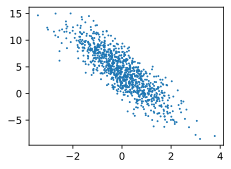

In [24]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1);
print(features[0:10])

In [27]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indice = indices[i:min(i+batch_size,num_examples)]
        print(batch_indice)
        yield features[batch_indice],labels[batch_indice]

In [28]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

[740, 503, 495, 264, 448, 334, 821, 882, 494, 214]
tensor([[ 1.8959, -0.8648],
        [ 0.9016, -0.7178],
        [ 0.9973,  0.1318],
        [-1.2472,  0.6448],
        [ 0.6886,  1.0144],
        [ 1.9941, -0.5540],
        [-0.5450,  0.2802],
        [ 0.4177, -0.1240],
        [ 1.3492,  0.4310],
        [-0.2107,  0.1386]]) 
 tensor([[ 9.0268],
        [ 8.2581],
        [ 7.2230],
        [ 1.3564],
        [ 1.3860],
        [10.8976],
        [ 2.0759],
        [ 5.9751],
        [ 5.9766],
        [ 3.2577]])


In [29]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [31]:
def linreg(X,w,b):
    return torch.matmul(X,w)+b

In [32]:
def square_loss(y_hat, y):
    return (y.reshape(y_hat.shape) - y_hat) ** 2 / 2